## <span style="color:#000066"> Question 9: College Dataset </span> 

In this exercise, we will use College dataset, and understand the mechanics of Ridge, lasso PCR and PLS.<br>

Assumption: Reader has basic understanding of python and statistics.

*Suggestion: This tutorial should be read in conjunction with Chapter6 of ISLR*

#### Importing all dependencies from module

In [68]:
from chapter6_imports import *

### Description

In this exercise we will be exploring **college dataset** which contains  information for 777 different universities and colleges in US. 

<a>
    
- Description: Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.
    
- Usage: College - U.S. News and World Report’s College Data
    
- Format: A data frame with 777 observations on the following 18 variables.
    - __*Apps:*__ Number of applications received
    - __*Accept:*__ Number of applications accepted
    - __*Enroll:*__ Number of new students enrolled
    - __*Top10perc Pct.:*__ new students from top 10% of H.S. class
    - __*Top25perc Pct.:*__ new students from top 25% of H.S. class
    - __*F.Undergrad:*__ Number of fulltime undergraduates
    - __*Undergrad:*__ Number of parttime undergraduates
    - __*Outstate:*__ Out-of-state tuition
    - __*Room.Board:*__ Room and board costs
    - __*Books:*__ Estimated book costs
    - __*Personal:*__ Estimated personal spending
    - __*PhD:*__ Pct. of faculty with Ph.D.’s
    - __*Terminal:*__ Pct. of faculty with terminal degree
    - __*S.F.Ratio:*__ Student/faculty ratio
    - __*perc.alumni:*__ Pct. alumni who donate
    - __*Expend:*__ Instructional expenditure per student
    - __*Grad.Rate:*__ Graduation rate
</a>

__*Source-*__
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
The dataset was used in the ASA Statistical Graphics Section’s 1995 Data Analysis Exposition.

In [69]:
college_dataset =  pd.read_csv(r'../../data/College.csv')
college_dataset.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Before starting our analysis, let's split the data into training and testing sets

In [70]:
college_dataset = college_dataset.rename(columns={'Unnamed: 0': 'Name'})
college_dataset['Private'] = college_dataset['Private'].map({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(college_dataset.drop(['Name', 'Apps'], axis=1), college_dataset['Apps'], 
                                                    test_size=0.33, random_state=42)

#### MULTI LINEAR REGRESSION

For starters, let's begin with classic multiple linear regresision model

In [71]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
print("Test Error: " +str(mean_squared_error(y_test, predictions)))

Test Error: 1775604.0090834724


#### RIDGE REGRESSION

Let's  now fit a ridge regression

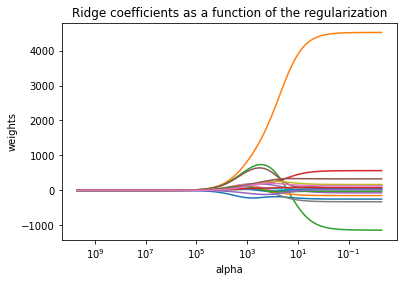

In [72]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(preprocessing.scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

The above plot shows that the Ridge coefficients get larger when we decrease alpha.

In [73]:
ridge_model = RidgeCV(alphas=alphas, fit_intercept=True, cv=None, store_cv_values=True, scoring='neg_mean_squared_error')
ridge_model.fit(preprocessing.scale(X_train), y_train)
predictions = ridge_model.predict(preprocessing.scale(X_test))
print("Test Error: " +str(mean_squared_error(y_test, predictions)))

Test Error: 2223172.5941450484


In [74]:
print(ridge_model.alpha_)
ridge.set_params(alpha=ridge_model.alpha_)
ridge.fit(preprocessing.scale(X_train), y_train)
mean_squared_error(y_test, ridge.predict(preprocessing.scale(X_test)))

0.005


2223172.594795643

In [75]:
pd.Series(ridge.coef_.flatten(), index=X_train.columns)

Private        -248.389469
Accept         4517.843978
Enroll        -1136.030417
Top10perc       565.072866
Top25perc       -69.055797
F.Undergrad     157.795416
P.Undergrad      26.167945
Outstate       -324.562086
Room.Board      168.263003
Books            24.301468
Personal         50.432413
PhD            -147.439672
Terminal        -22.018990
S.F.Ratio        81.472069
perc.alumni      25.410498
Expend          330.015821
Grad.Rate       130.247590
dtype: float64

#### LASSO REGRESSION

Let's check Lasso Regression

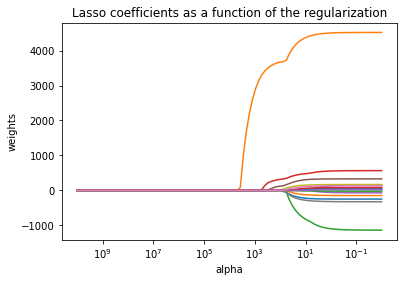

In [76]:
coefs = []
lasso = Lasso(max_iter=10000)
for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(preprocessing.scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [77]:
lasso_model = LassoCV(alphas=alphas, fit_intercept=True, cv=None)
lasso_model.fit(preprocessing.scale(X_train), y_train)

predictions = lasso_model.predict(preprocessing.scale(X_test))
print("Test Error: " +str(mean_squared_error(y_test, predictions)))

Test Error: 2223323.813680018


In [78]:
lasso_model.alpha_

0.005

In [79]:
lasso.set_params(alpha=lasso_model.alpha_)
lasso.fit(preprocessing.scale(X_train), y_train)
mean_squared_error(y_test, lasso.predict(preprocessing.scale(X_test)))

2223323.813680018

In [80]:
pd.Series(lasso.coef_, index=X_train.columns)

Private        -248.396346
Accept         4518.167412
Enroll        -1136.334831
Top10perc       565.091045
Top25perc       -69.056526
F.Undergrad     157.784908
P.Undergrad      26.174730
Outstate       -324.567771
Room.Board      168.227067
Books            24.296441
Personal         50.439832
PhD            -147.440770
Terminal        -22.007771
S.F.Ratio        81.459956
perc.alumni      25.417236
Expend          329.999089
Grad.Rate       130.224720
dtype: float64

#### PCR and PLS

In [89]:
def fit_pca(X_train, X_test, y_train, y_test, comps_req=1):
    pca = PCA(n_components=comps_req)
    train_scores = pca.fit_transform(preprocessing.scale(X_train))
    test_scores = pca.fit_transform(preprocessing.scale(X_test))
    model = LinearRegression(fit_intercept=True)
    model.fit(train_scores, y_train)
    preds = model.predict(test_scores)
    test_MSE = mean_squared_error(preds, y_test)
    return test_MSE 

def fit_pls(X_train, X_test, y_train, y_test, comps_req=1):
    pca = PCA(n_components=comps_req)
    train_scores = pca.fit_transform(preprocessing.scale(X_train))
    test_scores = pca.fit_transform(preprocessing.scale(X_test))
    model = LinearRegression(fit_intercept=True)
    model.fit(train_scores, y_train)
    preds = model.predict(test_scores)
    test_MSE = mean_squared_error(preds, y_test)
    return test_MSE 

def fit_PCR_PLS(X_train, y_train, X_test, y_test, total_comp, model_type = 'PCR'):
    funct_dict = {'PCR': fit_pca, 'PLS':fit_pls}
    test_MSE = {}
    for comp in range(1,len(X_train.columns)):
        test_MSE[comp] = funct_dict[model_type](X_train, X_test, y_train, y_test, comp)
    return test_MSE

def fit_PCR_PLS_CV(X_train, y_train, X_test, y_test, total_comp, model_type = 'PCR'):
    funct_dict = {'PCR': fit_pca, 'PLS':fit_pls}
    val_MSE = {}
    y_train = y_train.reset_index()
    X_test = X_test.reset_index()
    y_test = y_test.reset_index()
    X_train = X_train.reset_index()
    for comp in range(1,len(X_train.columns)):
        print(comp)
        for train_index, test_index in LeaveOneOut().split(X_train):
            X, X_CV = X_train[train_index], X_train[test_index]
            Y, Y_CV = y_train[train_index], y_train[test_index]
            mse += funct_dict[model_type](X, X_CV, Y, Y_CV, comp)
        val_MSE[comp] = mse/len(X_train)
    return val_MSE
        
def plot_pca_results (mse_comp_dictn, title, xlab, ylab):
    x,y = zip(*(sorted(mse_comp_dictn.items())))
    fig,ax = plt.subplots()
    plt.plot(x, y, color='r')
    plt.grid()
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)

In [90]:
test_mse = fit_PCR_PLS(X_train, y_train, X_test, y_test, len(X_train.columns), model_type = 'PCR')
#validation_mse = fit_PCR_PLS_CV(X_train, y_train, X_test, y_test, len(X_train.columns), model_type = 'PCR')

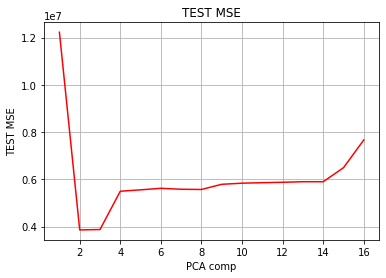

In [91]:
plot_pca_results(test_mse, 'TEST MSE', 'PCA comp', 'TEST MSE')

In [92]:
plot_pca_results(validation_mse, 'VALIDATION MSE', 'PCA comp', 'VALIDATION MSE')

NameError: name 'validation_mse' is not defined

In [94]:
test_mse_pls = fit_PCR_PLS(X_train, y_train, X_test, y_test, len(X_train.columns), model_type = 'PLS')
#validation_mse_pls = fit_PCR_PLS_CV(X_train, y_train, X_test, y_test, len(X_train.columns), model_type = 'PCR')

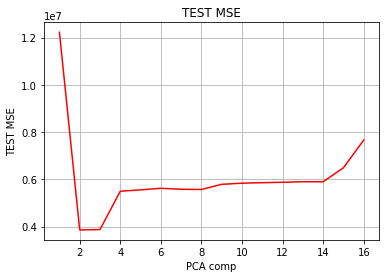

In [95]:
plot_pca_results(test_mse_pls, 'TEST MSE', 'PCA comp', 'TEST MSE')

In [96]:
plot_pca_results(validation_mse_pls, 'VALIDATION MSE', 'PCA comp', 'VALIDATION MSE')

NameError: name 'validation_mse_pls' is not defined